In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# <font color=blue> Author: Ingrid Bena Ria</font>

>Date: Monday, January 24th 2022<br>

In [23]:
dataset = pd.read_excel("C:\Jupyter\GRIP Jan 2022\Sample.xlsx")
dataset

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,26196,2,0,419136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,73194,3,0,219582
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,1462,2,0,68714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,9575775,5,45,-383031
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22368,2,2,25164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25248,3,2,41028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,9196,2,0,156332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258576,2,2,193932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,296,4,0,1332


In [24]:
dataset.head(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,26196,2,0,419136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,73194,3,0,219582
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,1462,2,0,68714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,9575775,5,45,-383031
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22368,2,2,25164



# <font color=blue> DATA ANALYSIS</font>

In [26]:
dataset.shape

(9994, 13)

In [27]:
dataset.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [28]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Ship Mode     9994 non-null   object
 1   Segment       9994 non-null   object
 2   Country       9994 non-null   object
 3   City          9994 non-null   object
 4   State         9994 non-null   object
 5   Postal Code   9994 non-null   int64 
 6   Region        9994 non-null   object
 7   Category      9994 non-null   object
 8   Sub-Category  9994 non-null   object
 9   Sales         9994 non-null   int64 
 10  Quantity      9994 non-null   int64 
 11  Discount      9994 non-null   int64 
 12  Profit        9994 non-null   int64 
dtypes: int64(5), object(8)
memory usage: 1015.1+ KB


In [30]:
dataset.describe(include='all')

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
count,9994,9994,9994,9994,9994,9994.000000,9994,9994,9994,9.994000e+03,9994.000000,9994.000000,9.994000e+03
unique,4,3,1,531,49,NaN,4,3,17,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,United States,New York City,California,NaN,West,Office Supplies,Binders,NaN,NaN,NaN,NaN
freq,5968,5191,9994,915,2001,NaN,3203,6026,1523,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,55190.379428,NaN,NaN,NaN,1.132271e+05,3.789574,1.754653,1.800957e+05
std,NaN,NaN,NaN,NaN,NaN,32063.693350,NaN,NaN,NaN,5.186212e+05,2.225110,3.119014,1.722971e+06
min,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,3.000000e+00,1.000000,0.000000,-3.839990e+07
25%,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,2.516000e+03,2.000000,0.000000,2.245000e+03
50%,NaN,NaN,NaN,NaN,NaN,56430.500000,NaN,NaN,NaN,1.108800e+04,3.000000,2.000000,3.630900e+04
75%,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,5.399175e+04,5.000000,2.000000,1.509840e+05


# Count of Unique Values in Each Column

In [32]:
for i in dataset.columns:
    print(i,len(dataset[i].unique()))

Ship Mode 4
Segment 3
Country 1
City 531
State 49
Postal Code 631
Region 4
Category 3
Sub-Category 17
Sales 5336
Quantity 14
Discount 12
Profit 7063


# Count of Unique Values in Each Row

In [35]:
print(dataset.nunique(axis=1))

0       13
1       13
2       13
3       13
4       12
        ..
9989    13
9990    13
9991    12
9992    13
9993    13
Length: 9994, dtype: int64


# Count of Each of the Distinct Values of a Spesific Column
>Date: For example in the column "Profit": we got:</br>


In [41]:
print(dataset['Profit'].value_counts())

0         65
62208     43
93312     38
54432     32
36288     32
          ..
30134      1
35256      1
586872     1
125469     1
72948      1
Name: Profit, Length: 7063, dtype: int64


# Check for Null Values
    - Indicate if there any missing values  in dataframe as a whole
    - Indicate if there any missing values accross each column
    - Indicate groupby count of missing values of a column
    

In [43]:
dataset.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

# <font color=blue>Correlation</font>

<AxesSubplot:>

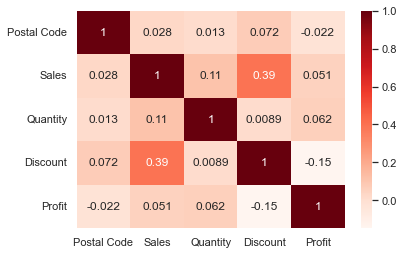

In [102]:
correlation = dataset.corr()
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True,cmap='Reds')

# <font color=blue>Data Visualisation</font>

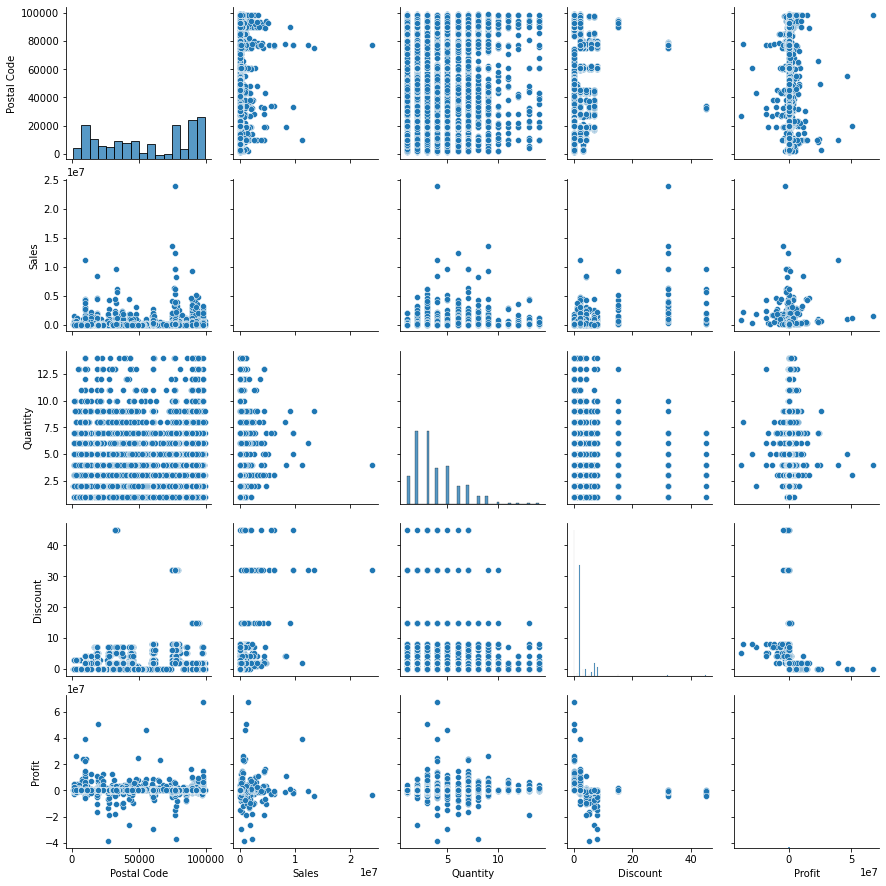

In [47]:
sns.pairplot(dataset)

In [54]:
sns.set()

<AxesSubplot:xlabel='Profit', ylabel='Density'>

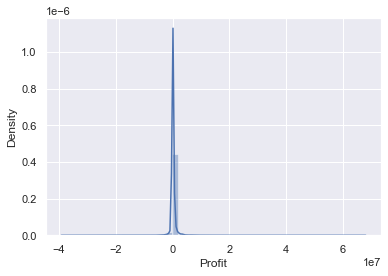

In [65]:
#Distribution plot 
sns.distplot(dataset['Profit'])

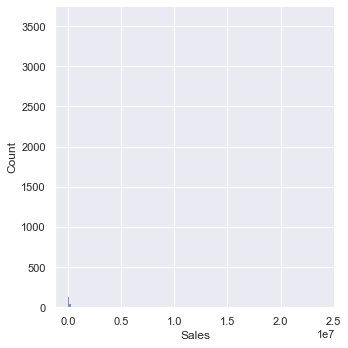

In [72]:
#Distribution plot 
sns.displot(dataset['Sales'])

In [90]:
plt.figure(figsize=(8,6))
plt.bar(['Sub-Category','Category'])
plt.xlabel('Sub-Category')
plt.ylabel('Category')
plt.show()

TypeError: bar() missing 1 required positional argument: 'height'

<Figure size 576x432 with 0 Axes>

C:\Users\User\AppData\Local\Temp/ipykernel_10160/3204473833.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dataset.groupby ('Category')['Profit','Sales'].agg(sum).plot.bar()


Text(0.5, 1.0, 'Profitability and Sales by Sub Categories')

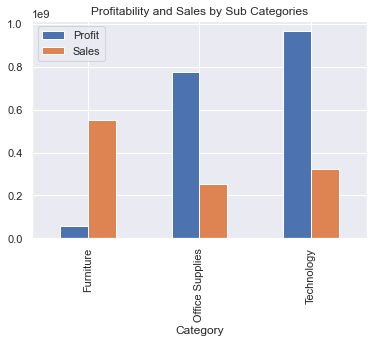

In [116]:
dataset.groupby ('Category')['Profit','Sales'].agg(sum).plot.bar()
plt.title('Profitability and Sales by Sub Categories')

In [134]:
dataset.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5336
Quantity          14
Discount          12
Profit          7063
dtype: int64

In [135]:
# Drop unecessary columns:
dataset = dataset.drop(columns={'Country','Postal Code'},axis=1)
dataset.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,26196,2,0,419136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,73194,3,0,219582
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,1462,2,0,68714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,9575775,5,45,-383031
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22368,2,2,25164


In [136]:
# Group by
category_sales_profit = dataset.groupby('Category').sum()
display(category_sales_profit)

,Sales,Quantity,Discount,Profit
Category,,,,
Furniture,551391138,8028,5614,59222369
Office Supplies,255389649,22906,9478,775994074
Technology,324810933,6939,2444,964660095


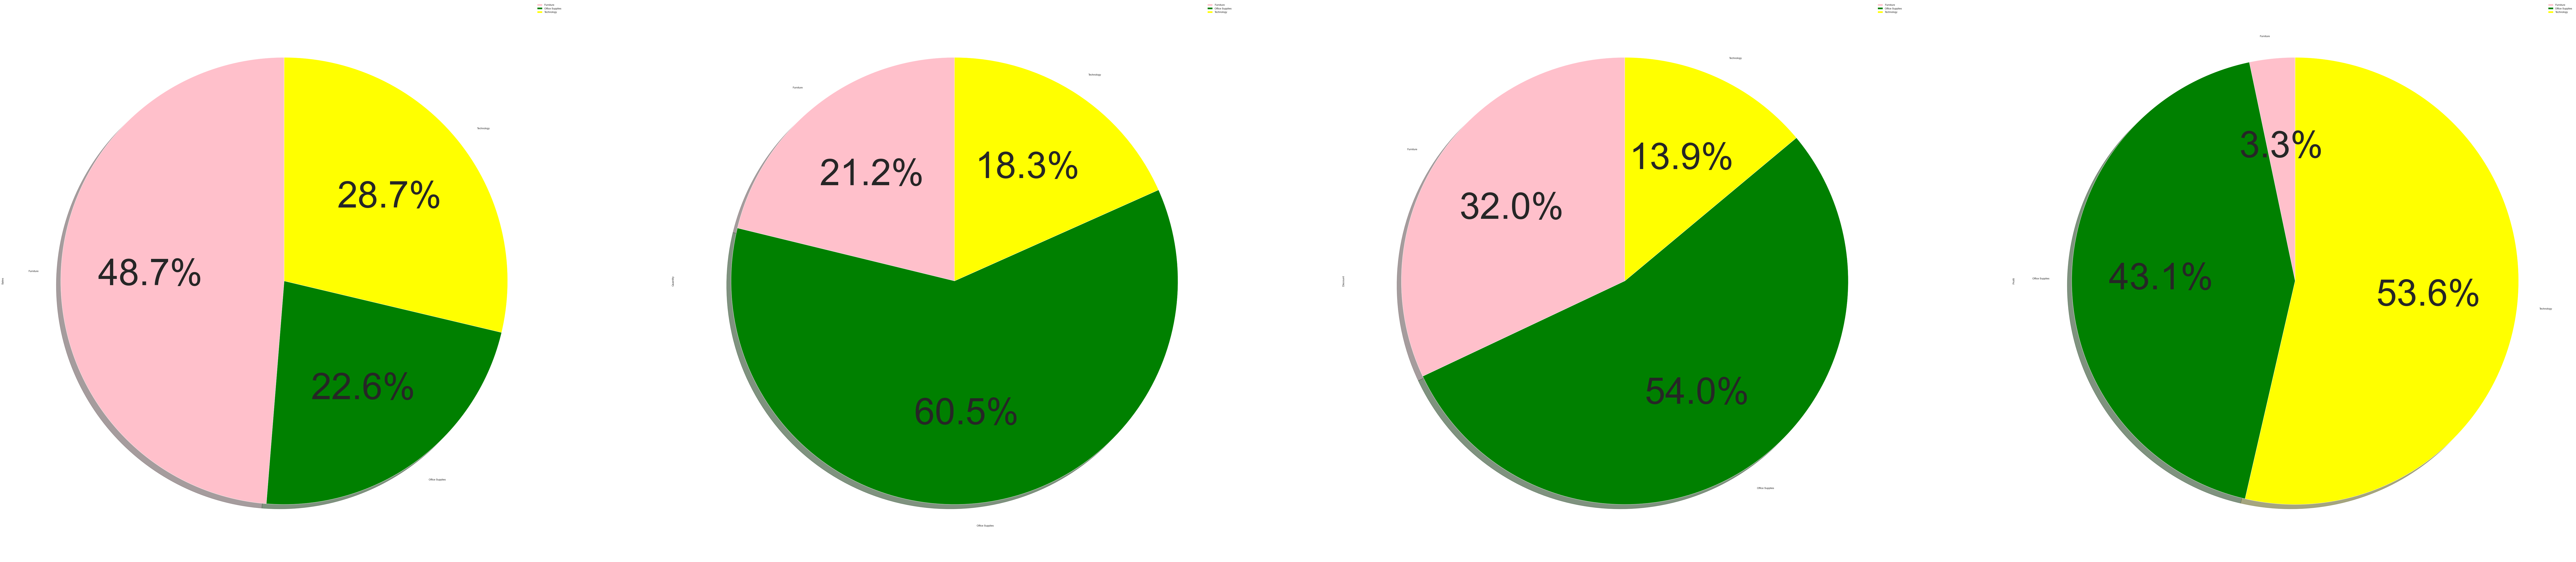

In [146]:
# Sales,Quantity,Discount and profit of categories
plt.style.use('seaborn-darkgrid')
#colors
colors = ['pink','green','yellow','black']
category_sales_profit.plot.pie(colors = colors,shadow = True, startangle=90, subplots=True,figsize=(200,100),autopct='%1.1f%%')
plt.rcParams['font.size'] =200.0
plt.show()

In [150]:
Segment_sales_profit=dataset.groupby('Segment').sum()
display(Segment_sales_profit)

,Sales,Quantity,Discount,Profit
Segment,,,,
Consumer,599181488,19521,9218,911080571
Corporate,334243082,11608,5377,509726140
Home Office,198167150,6744,2941,379069827


In [177]:
# group by quantity , sales and profit
Quantity_sales_profit = dataset.groupby('Quantity').sum() 
display(Quantity_sales_profit)

,Sales,Discount,Profit
Quantity,,,
1,31868254,1556,37786843
2,164612802,4149,193309184
3,248840991,4150,419097135
4,182031203,2115,309746771
5,71857741,2139,164646750
6,116324529,1049,77379714
7,136723734,1176,283168473
8,61826580,468,67099551
9,78224832,424,165317616


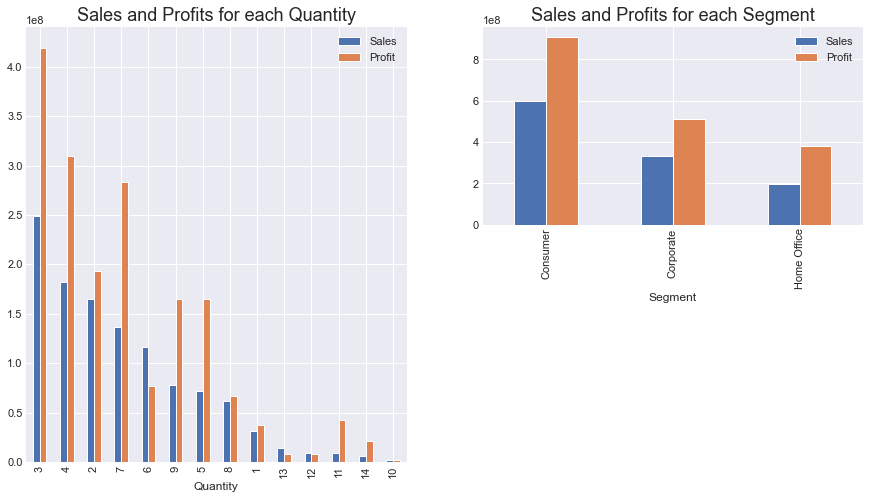

In [178]:
#Sales and Profits of each Quantity and each Segment
fig=plt.figure(figsize=(15,8))
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(222)
dataset.groupby("Quantity")[["Sales", "Profit"]].sum().sort_values(by = "Sales", ascending = False).plot(kind = "bar",ax=ax1)
ax1.set_title("Sales and Profits for each Quantity",size=18)
dataset.groupby("Segment")[["Sales", "Profit"]].sum().sort_values(by = "Sales", ascending = False).plot(kind = "bar",ax=ax2)
ax2.set_title("Sales and Profits for each Segment",size=18)
plt.show()

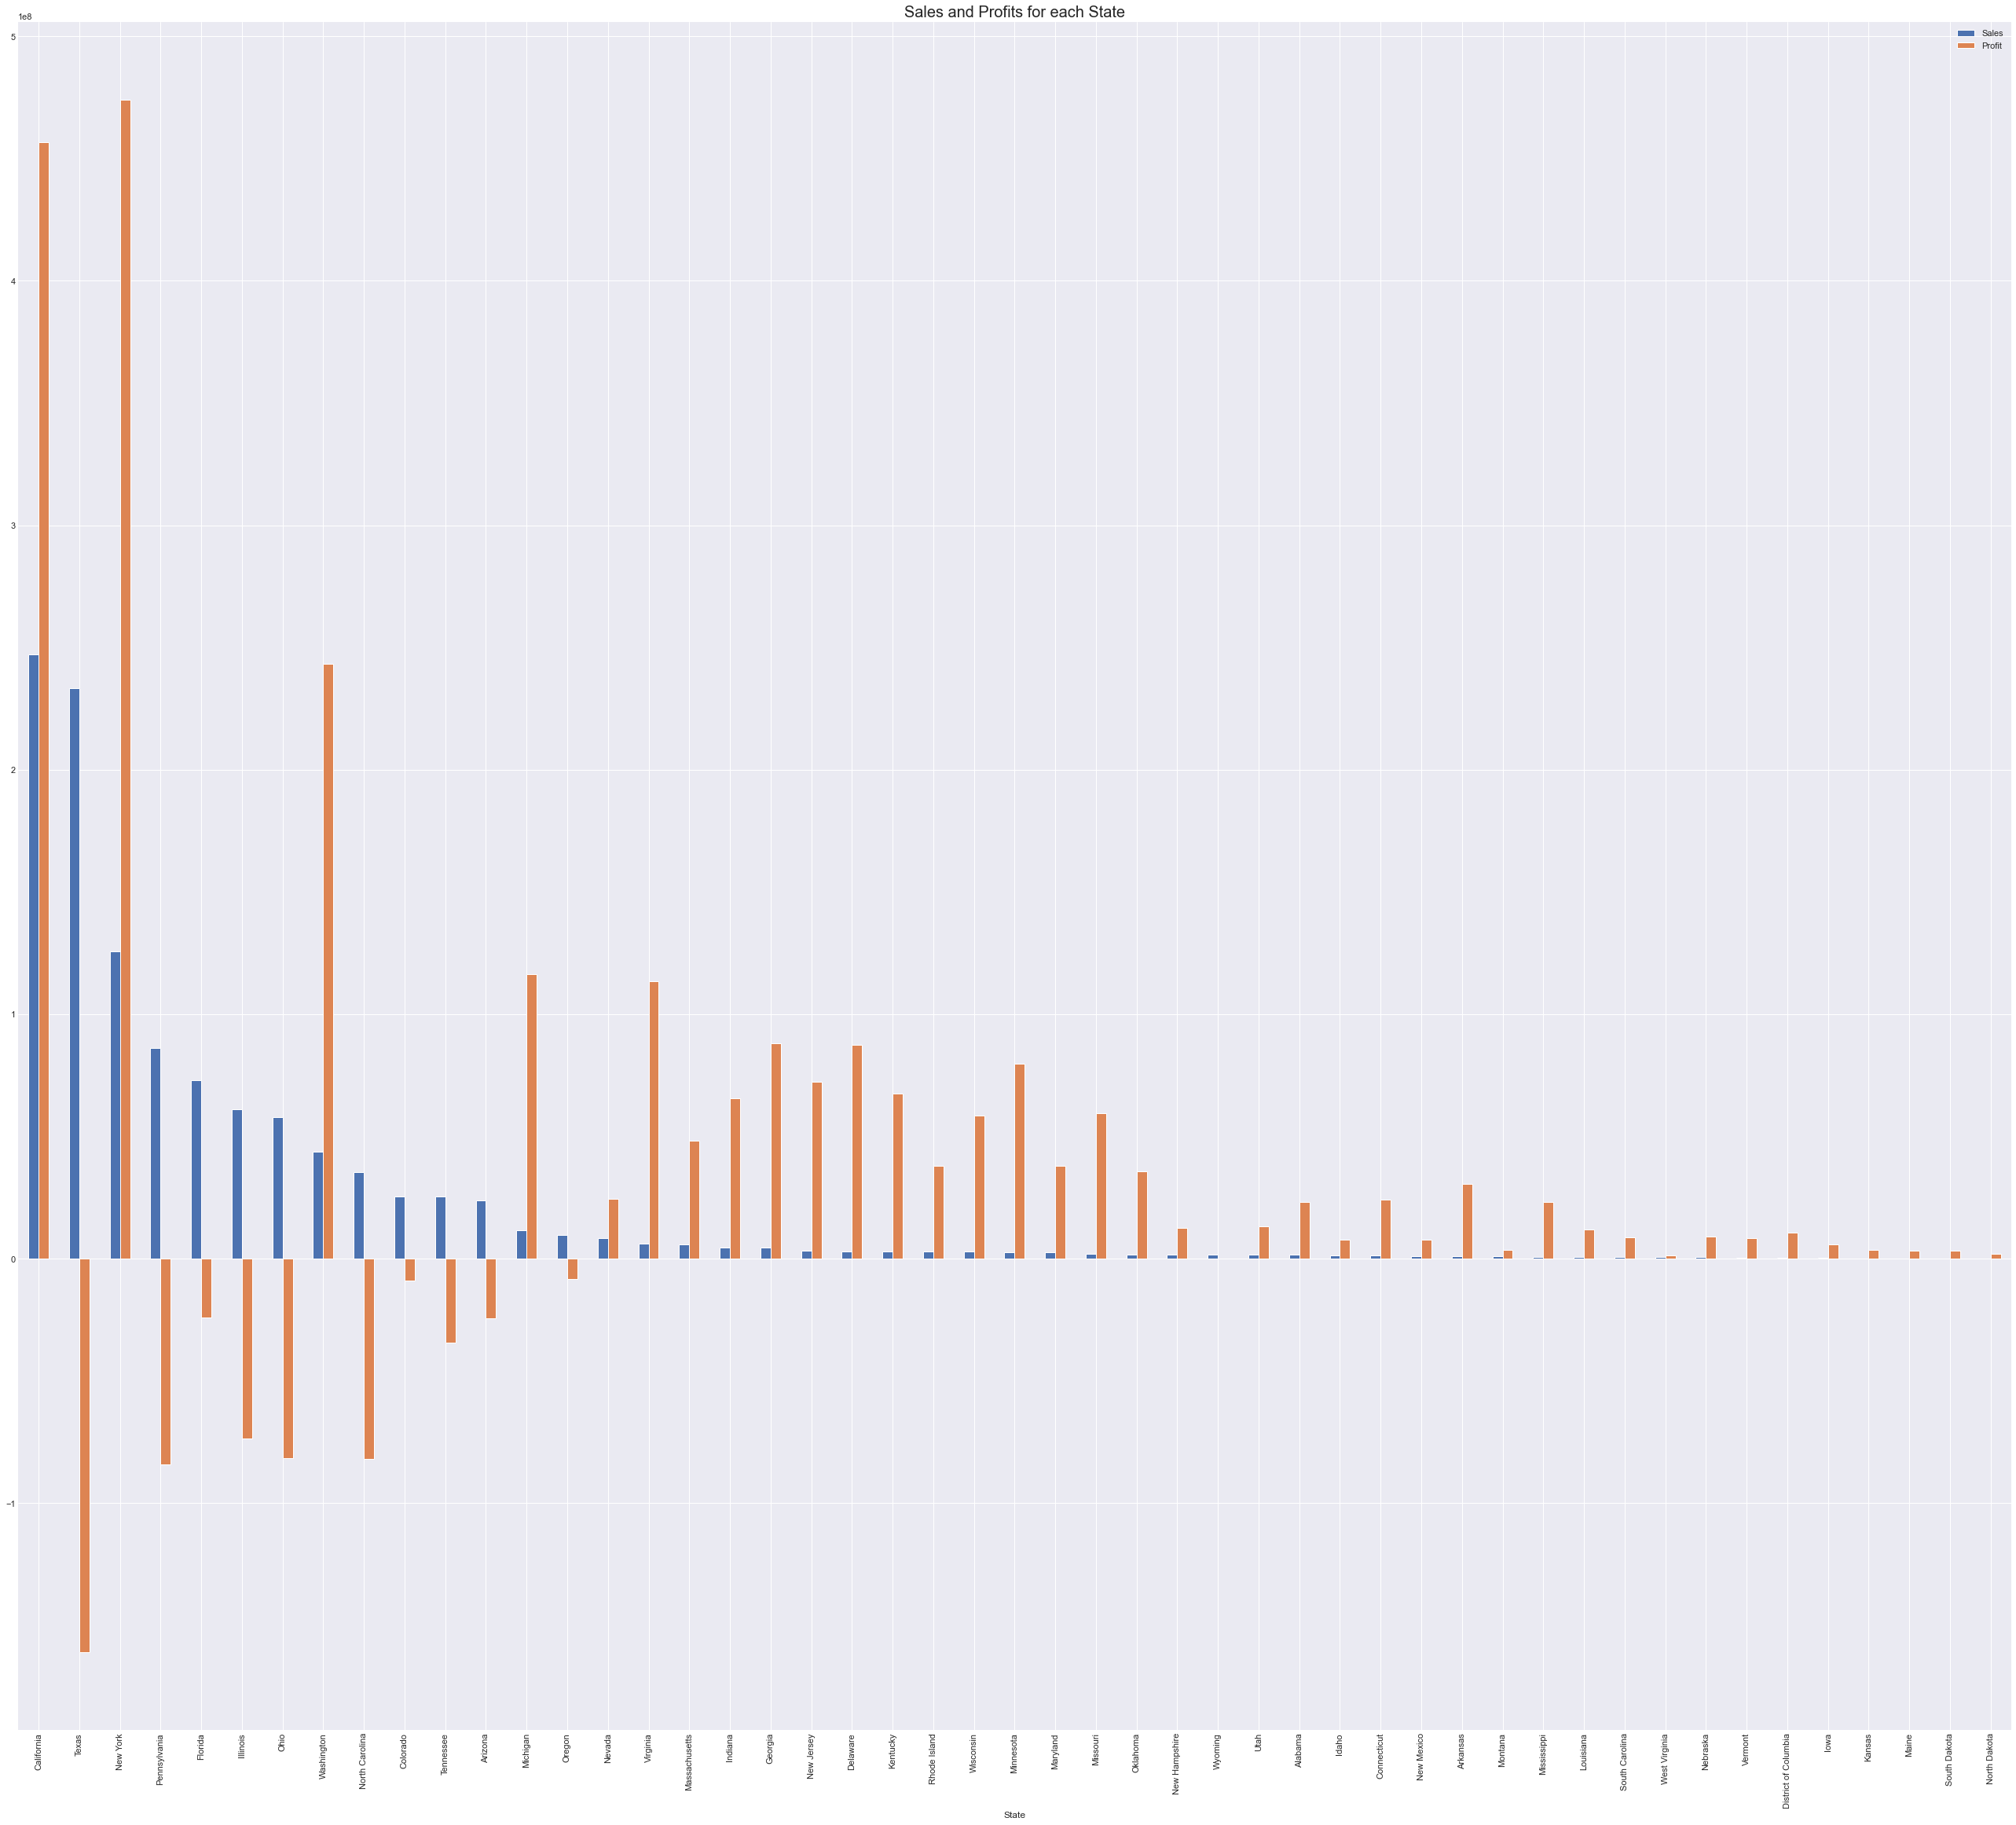

In [179]:
#Sales and Profits of each State
fig = plt.figure(figsize =(100,40))
ax1 = fig.add_subplot(121)
dataset.groupby("State")[["Sales","Profit"]].sum().sort_values(by = "Sales", ascending = False).plot(kind = "bar",ax=ax1)
ax1.set_title("Sales and Profits for each State", size=20)
plt.show()